# De Community Challenge - week 49 - Anja Rentier

In deze notebook gaan we een coach rooster maken. De opdracht is:

Bit-Academy wil graag het inroosteren van de community coaches automatiseren. Aan jou de taak om een programma te schrijven dat een rooster genereert. Begin door de beschikbaarheid van de coaches in een geschikte datastructuur te zetten.


<center> ★ 

Maak een rooster dat iedere coach ten minste 1 keer inroostert. Laat vervolgens het rooster zien op een overzichtelijke manier. Je mag er voor nu nog vanuit gaan dat een coaching sessie de gehele dag duurt en dat de coaches de gehele dag beschikbaar zijn.
    

<center> ★ ★
    

Het blijkt het team toch gelukt te zijn om een rooster te fabriceren. Het ziet er als volgt uit.
Sorteer de coaches op basis van aantal uren in de week en op basis van naam. Geef deze data op een leuke manier weer.
    

<center> ★ ★ ★

    
Het gegenereerde rooster heeft echter niet met iedereen rekening kunnen houden. Bij welke coach is zijn voorkeur het meeste naar voren gekomen en bij wie minder? Druk dit uit in percentages van ingeplande uren binnen de voorkeur / totaal ingeplande uren x 100%.
    
    
<center> ★ ★ ★ ★
    
Genereer nu zelf een rooster die zo veel mogelijk luistert naar de voorkeur van de coaches. De shifts zijn hieronder in de tabel te vinden.

In [1]:
# we beginnen deze opdracht met importeren van de benodigde modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import csv
from IPython.display import display, HTML, display_html

### Opdracht ★

Om de data weer te geven heb ik gebruik gemaakt van een python file. Deze file zet de data om in een meerdere csv bestanden, die makkelijk te verwerken is in een jupyter notebook. 
Het ene bestand bevat de beschikbaarheid van de coaches en de voorkeuren, het andere bestand bevat een leeg rooster.

In [2]:
# run het python bestand
%run rooster.py

# dataframes aanmaken
df_leegrooster = pd.read_csv('leegRooster.csv')
df_coach = pd.read_csv('coaches.csv')

# dataframes laten zien
df_coach_styler = df_coach.style.set_caption('Beschikbaarheid van coaches')
df_leegrooster_styler = df_leegrooster.style.set_caption('Leeg rooster')

display_html(df_coach_styler._repr_html_() + df_leegrooster_styler._repr_html_(), raw=True)


Beschikbaarheid van coaches 
 
 
   
 Name 
 Mon1 
 Mon2 
 Tue1 
 Tue2 
 Wed1 
 Wed2 
 Thu1 
 Thu2 
 Fri 
 Sat 
 Sun 
 Pref-Morning 
 Pref-Noon 
 Pref-Evening 
 Pref-Day 
 
 
 
 
 0 
 Sander 
 True 
 True 
 False 
 False 
 True 
 True 
 False 
 False 
 True 
 False 
 True 
 False 
 False 
 True 
 False 
 
 
 1 
 Alexander 
 True 
 True 
 False 
 False 
 False 
 False 
 True 
 True 
 False 
 True 
 False 
 False 
 False 
 True 
 False 
 
 
 2 
 Nick 
 False 
 False 
 True 
 True 
 False 
 False 
 False 
 False 
 True 
 False 
 False 
 True 
 True 
 True 
 True 
 
 
 3 
 Sam 
 False 
 False 
 False 
 False 
 True 
 True 
 False 
 False 
 True 
 False 
 False 
 True 
 True 
 True 
 True 
 
 
 4 
 Daniel 
 False 
 False 
 True 
 True 
 False 
 False 
 True 
 False 
 False 
 False 
 False 
 True 
 True 
 False 
 True 
 
 
 5 
 Henok 
 False 
 False 
 True 
 True 
 True 
 True 
 False 
 False 
 False 
 False 
 False 
 False 
 True 
 True 
 True 
 
 
 

 
 Leeg rooster 
 
 
   
 Dag 
 Van 
 Tot 
 Ingeroosterd 
 
 
 
 
 0 
 Maandag 
 09:00 
 17:30 
 nan 
 
 
 1 
 Maandag 
 19:00 
 21:00 
 nan 
 
 
 2 
 Dinsdag 
 09:00 
 17:30 
 nan 
 
 
 3 
 Dinsdag 
 19:00 
 21:00 
 nan 
 
 
 4 
 Woensdag 
 09:00 
 17:30 
 nan 
 
 
 5 
 Woensdag 
 19:00 
 21:00 
 nan 
 
 
 6 
 Donderdag 
 09:00 
 17:30 
 nan 
 
 
 7 
 Donderdag 
 19:00 
 21:00 
 nan 
 
 
 8 
 Vrijdag 
 09:00 
 17:30 
 nan 
 
 
 9 
 Zaterdag 
 09:00 
 17:30 
 nan 
 
 
 10 
 Zondag 
 09:00 
 17:30 
 nan

We gaan nu het lege rooster vullen, zodat elke coach minstens 1 keer wordt ingeroosterd. Ik ga dat oplossen met 2 loops die de namen van de coaches uit het `coaches dataframe` laten zien, als ieder 1 keer is ingeroosterd begint de loop weer opnieuw, totdat alle rijen van het rooster gevuld zijn.

In [3]:
column_length_coaches = int(df_coach.Name.count())
column_length_rooster = int(df_leegrooster.Dag.count())

i = 0
#for index, row in df_leegrooster.iterrows():
for row in df_leegrooster.iterrows():
    if i < column_length_coaches :
        df_leegrooster.loc[i, 'Ingeroosterd'] = (df_coach['Name'][i])
        i += 1
    else:
        if i < column_length_rooster:
            df_leegrooster.loc[i, 'Ingeroosterd'] = (df_coach['Name'][i - column_length_coaches])
            i += 1
        else:
            print('oeps, foutje')

df_leegrooster_styler = df_leegrooster.style.set_caption('Rooster coaches, voorkeur niet gebruikt')
display_html(df_leegrooster_styler._repr_html_(), raw=True)

,Dag,Van,Tot,Ingeroosterd
0,Maandag,09:00,17:30,Sander
1,Maandag,19:00,21:00,Alexander
2,Dinsdag,09:00,17:30,Nick
3,Dinsdag,19:00,21:00,Sam
4,Woensdag,09:00,17:30,Daniel
5,Woensdag,19:00,21:00,Henok
6,Donderdag,09:00,17:30,Sander
7,Donderdag,19:00,21:00,Alexander
8,Vrijdag,09:00,17:30,Nick
9,Zaterdag,09:00,17:30,Sam


### Opdracht ★★

We hebben een voorbeeld gekregen van een rooster. Dit is het csv bestand `ingeroosterd`. We gaan nu de coaches sorteren op basis van uren in de week en op naam. De data gaan we visueel weergeven.


In [4]:
df_rooster = pd.read_csv('ingeroosterd.csv')
df_rooster

,Dag,Van,Tot,Ingeroosterd
0,Maandag,09:00,17:30,Sander
1,Maandag,19:00,21:00,Alexander
2,Dinsdag,09:00,17:30,Daniel
3,Dinsdag,19:00,21:00,Nick
4,Woensdag,09:00,17:30,Henok
5,Woensdag,19:00,21:00,Sam
6,Donderdag,09:00,17:30,Daniel
7,Donderdag,19:00,21:00,Alexander
8,Vrijdag,09:00,17:30,Sander
9,Zaterdag,09:00,17:30,Alexander


Om de tijden van elkaar af te trekken moeten we eerst de kolommen omzetten in een datetime formaat. Hiervoor maken we 2 aparte kolommen in de dataframe. De werktijd per shift zetten we in een derde extra kolom `worktime`.

In [5]:
# tijden omzetten in 2 kolommen met datetime formaat
df_rooster['Starttijd'] = pd.to_datetime(df_rooster['Van'], format='%H:%M')
df_rooster['Stoptijd'] = pd.to_datetime(df_rooster['Tot'], format='%H:%M')

# kolom worktime maken
worktime = df_rooster.Stoptijd - df_rooster.Starttijd
df_rooster['Werktijd'] = worktime.astype('timedelta64[m]')

# de datum verwijderen van de kolommen starttijd en stoptijd
df_rooster['Starttijd'] = df_rooster['Starttijd'].dt.time
df_rooster['Stoptijd'] = df_rooster['Stoptijd'].dt.time

# selectie maken gebaseerd op naam en opgetelde werktijden, gesorteerd op Werktijd
df_show = df_rooster.groupby('Ingeroosterd')['Werktijd'].sum().sort_values().reset_index()

# minuten omzetten in gewerkte uren
df_show['Werktijd'] = df_show['Werktijd']/60

df_show

,Ingeroosterd,Werktijd
0,Nick,2.0
1,Sam,2.0
2,Henok,8.5
3,Alexander,12.5
4,Daniel,17.0
5,Sander,25.5


We gaan nu de dataframe sorteren op werktijd en naam. Dit geven we weer in een piechart.

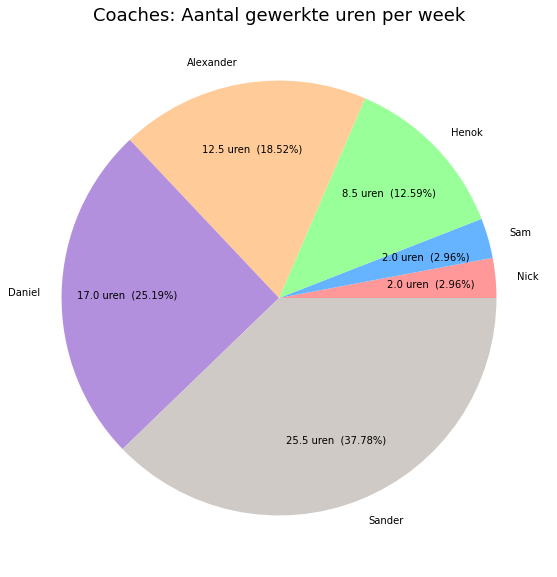

In [6]:
# definieren van waardes voor de pie-chart
plt.figure(figsize=(10, 10))
values = df_show['Werktijd']
labels = df_show['Ingeroosterd']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#b290de', '#cfcac6']

# functie om in de taartpunten het aantal uren en percentages aan te geven
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = (pct*total/100.0)
        return '{v:.1f} uren  ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

# plotten van de pie-chart
plt.pie(values, labels=labels, colors = colors, pctdistance=0.7, autopct=make_autopct(values))

plt.title("Coaches: Aantal gewerkte uren per week", fontsize=18);
plt.show()


### Opdracht ★ ★ ★

Het gegenereerde rooster heeft echter niet met iedereen rekening kunnen houden. Bij welke coach is zijn voorkeur het meeste naar voren gekomen en bij wie minder? Druk dit uit in percentages van ingeplande uren binnen de voorkeur / totaal ingeplande uren x 100%.

In [7]:
# in het coach dataframe een extra kolom toevoegen met de gewerkte uren
df_show = df_rooster.groupby('Ingeroosterd')['Werktijd'].sum().reset_index()
df_show = df_show.rename(columns={"Ingeroosterd": "Name", "Werktijd": "Werktijd"})
df_coach = df_coach.merge(df_show,on='Name',how="right")

# een selectie maken van het coach dataframe
df_preference = df_coach[['Name', 'Pref-Day', 'Pref-Evening', 'Werktijd']]
df_preference

,Name,Pref-Day,Pref-Evening,Werktijd
0,Alexander,False,True,750.0
1,Daniel,True,False,1020.0
2,Henok,True,True,510.0
3,Nick,True,True,120.0
4,Sam,True,True,120.0
5,Sander,False,True,1530.0


Ik heb hier boven de gewerkte uren in het beschikbaarheids-dataframe gezet. Nu gaan we uitzoeken hoe we kunnen berekenen welke uren de voorkeur hadden. Die zetten we in een kolom daarnaast.

In [8]:
df_rooster['Shift'] = ['Mon1', 'Mon2', 'Tue1', 'Tue2', 'Wed1', 'Wed2','Thu1', 'Thu2', 'Fri', 'Sat', 'Sun']
dayShift = ['Mon1', 'Tue1', 'Wed1', 'Thu1', 'Fri', 'Sat', 'Sun']
eveningShift = ['Mon2', 'Tue2', 'Wed2', 'Thu2']

df_rooster_kort = df_rooster[['Ingeroosterd', 'Shift']]
df_rooster_kort = df_rooster_kort.rename(columns={"Ingeroosterd": "Name", "Shift": "Shift"})

display(df_rooster_kort)

# Iterate over rows
for index, row in df_rooster_kort.iterrows():
    name = row[0]
    shift = row[1]
    print(name, shift)
    
    # dayShift vergelijken met preference day
    for index2, row2 in df_coach.iterrows():
        #print(row2)
        check1 = row2[0]
        check2 = row2[1]
        #print(check1, check2)
        df_rooster_kort.loc[index, 'Preference'] = np.select([check1 == name , check2 == 'True'], ['True', 'True'], 'True')
        
        #if check1 == name:
            #print(f'name {name} is een match, check2 = {check2}')
            #if check2 == 'True':
                #print('shift is ook een match')
                #df_rooster_kort.loc[index, 'Preference'] = 'True'
            
        
df_rooster_kort

,Name,Shift
0,Sander,Mon1
1,Alexander,Mon2
2,Daniel,Tue1
3,Nick,Tue2
4,Henok,Wed1
5,Sam,Wed2
6,Daniel,Thu1
7,Alexander,Thu2
8,Sander,Fri
9,Alexander,Sat


Sander Mon1
Alexander Mon2
Daniel Tue1
Nick Tue2
Henok Wed1
Sam Wed2
Daniel Thu1
Alexander Thu2
Sander Fri
Alexander Sat
Sander Sun


,Name,Shift,Preference
0,Sander,Mon1,True
1,Alexander,Mon2,True
2,Daniel,Tue1,True
3,Nick,Tue2,True
4,Henok,Wed1,True
5,Sam,Wed2,True
6,Daniel,Thu1,True
7,Alexander,Thu2,True
8,Sander,Fri,True
9,Alexander,Sat,True


In [17]:
df_coach.set_index("Name", inplace=True)
value = df_coach.loc[df_coach['Name'] == coach, ['Pref-Day']]
print(value)

KeyError: False

In [21]:
df_rooster['Shift'] = ['Mon1', 'Mon2', 'Tue1', 'Tue2', 'Wed1', 'Wed2','Thu1', 'Thu2', 'Fri', 'Sat', 'Sun']
dayShift = ['Mon1', 'Tue1', 'Wed1', 'Thu1', 'Fri', 'Sat', 'Sun']
eveningShift = ['Mon2', 'Tue2', 'Wed2', 'Thu2']

df_rooster_kort = df_rooster[['Ingeroosterd', 'Shift']]
df_rooster_kort = df_rooster_kort.rename(columns={"Ingeroosterd": "Name", "Shift": "Shift"})

display(df_rooster_kort)
display(df_preference)

m1 = df_preference['Name'] == name
m2 = df_preference['Pref-Day'] == 'True'

# df1['new column that will contain the comparison results'] = np.where(condition,'value if true','value if false')


# Iterate over rows
for index, row in df_rooster_kort.iterrows():
    name = row[0]
    shift = row[1]
    print(name, shift)
    if shift in dayShift:
        nameMatch = np.where(name == row["Name"], 'true', 'false')
        coach = name
        print(f'nameMatch = {nameMatch}')
        if nameMatch == 'true':
            condition = df_coach.loc[df_coach['Name'] == coach, ['Pref-Day']]
            print(f'condition = {condition}')
            shiftMatch = np.where(df_coach.loc[df_coach['Name'] == coach, ['Pref-Day']] == 'true', 'true', 'false')
            print(f'shiftMatch = {shiftMatch}')
            #df_rooster_kort.loc[index, 'Preference'] = shiftMatch
    if shift in eveningShift:
        nameMatch = np.where(name == row["Name"], 'true', 'false')
        print(f'nameMatch = {nameMatch}')
        if nameMatch == 'true':
            shiftMatch = np.where(df_preference['Pref-Evening'] == 'true', 'true', 'false')
            df_rooster_kort.loc[index, 'Preference'] = shiftMatch
            
df_rooster_kort

,Name,Shift
0,Sander,Mon1
1,Alexander,Mon2
2,Daniel,Tue1
3,Nick,Tue2
4,Henok,Wed1
5,Sam,Wed2
6,Daniel,Thu1
7,Alexander,Thu2
8,Sander,Fri
9,Alexander,Sat


,Name,Pref-Day,Pref-Evening,Werktijd
0,Alexander,False,True,750.0
1,Daniel,True,False,1020.0
2,Henok,True,True,510.0
3,Nick,True,True,120.0
4,Sam,True,True,120.0
5,Sander,False,True,1530.0


Sander Mon1
nameMatch = true
condition =    Pref-Day
5     False
shiftMatch = [['false']]
Alexander Mon2
nameMatch = true
Daniel Tue1
nameMatch = true
condition =    Pref-Day
1      True
shiftMatch = [['false']]
Nick Tue2
nameMatch = true


ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
 # dayShift vergelijken met preference day
    if df_rooster_kort['Shift'] in dayShift
    if column in dayShift:
        comparison_column = np.where(df_coach[column] == df_coach['Pref-Morning'], True, False)
        print(df_coach[column])
        print(df_coach['Pref-Morning'])
    df_coach['Pref-M-Check'] = comparison_column
    
    # eveningShift vergelijken met preference evening
    if column in eveningShift:
        comparison_column = np.where(df_coach[column] == df_coach['Pref-Evening'], True, False)
    df_coach['Pref-E-Check'] = comparison_column
    

        
df_coach

In [ ]:
df_rooster['Shift'] = ['Mon1', 'Mon2', 'Tue1', 'Tue2', 'Wed1', 'Wed2','Thu1', 'Thu2', 'Fri', 'Sat', 'Sun']
dayShift = ['Mon1', 'Tue1', 'Wed1', 'Thu1', 'Fri', 'Sat', 'Sun']
eveningShift = ['Mon2', 'Tue2', 'Wed2', 'Thu2']

df_rooster_kort = df_rooster[['Ingeroosterd', 'Shift']]
df_rooster_kort = df_rooster_kort.rename(columns={"Ingeroosterd": "Name", "Shift": "Shift"})

display(df_rooster_kort)

# Iterate over rows
for index, row in df_rooster_kort.iterrows():
    name = row[0]
    shift = row[1]
    print(name, shift)
    
    # dayShift vergelijken met preference day
    for index2, row2 in df_coach.iterrows():
        #print(row2)
        check1 = row2[0]
        check2 = row2[1]
        print(check1, check2)
        if check1 == name:
            print('name is een match')
           
            
            if check2 == True:
                print('shift is ook een match')
                df_rooster_kort.loc[index, 'Preference'] = True